# Exploratory Data Analysis

### Load librarires

In [113]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [114]:
path = os.getcwd()
path = path.replace('data_analysis', 'resources')
files = os.listdir(path)
for file in files:
    if len(file.split('.csv'))>1:
        csv_path = path+'/'+file
data = pd.read_csv(csv_path)

#### Apply cleaning and processing done in data preparation

In [115]:
data['SeniorCitizen']=data['SeniorCitizen'].map({0:'No', 1:'Yes'})
data['TotalCharges']=pd.to_numeric(data.TotalCharges, errors='coerce')
data.drop(data[data.TotalCharges.isna()].index, axis=0, inplace=True)
data.drop('customerID', axis=1, inplace=True)

### Data Overview

In [116]:
data.shape

(7032, 20)

In [117]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

### Target Analysis

In [119]:
import plotly.express as px


In [120]:
churn_count= data.Churn.value_counts()
churn_count

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [121]:
plt.figure(figsize=(5, 5))
fig = px.pie(names=churn_count.index, values = churn_count.values, hole=0.45, title='Customer Churn')
fig.update_layout(width=450, height=450)
fig.show()


<Figure size 500x500 with 0 Axes>

We can see that it is an imbalanced data set, with only a quarter churners.

### Univaraiate Analysis

We can now check the features individually to study their effetcs on churn

In [122]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Customer Demographic

#### `gender`

In [123]:
data.groupby(['Churn', 'gender']).size()

Churn  gender
No     Female    2544
       Male      2619
Yes    Female     939
       Male       930
dtype: int64

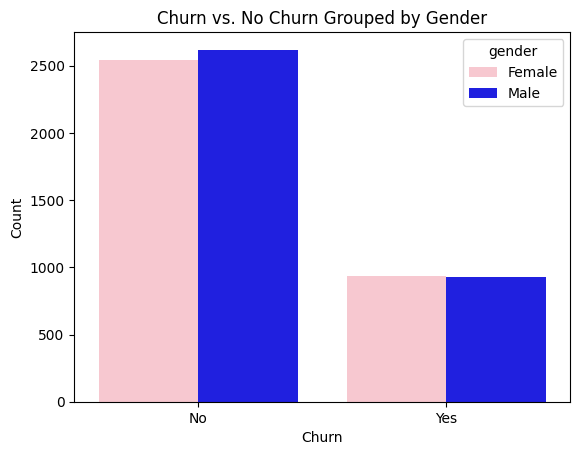

In [124]:
sns.countplot(data=data, x='Churn', hue='gender', palette=['pink', 'blue'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn vs. No Churn Grouped by Gender')
plt.show()

Churning seems to be uniform among Males and Females

#### `SeniorCitizen`

SeniorCitizen  Churn
No             No       4497
               Yes      1393
Yes            No        666
               Yes       476
dtype: int64

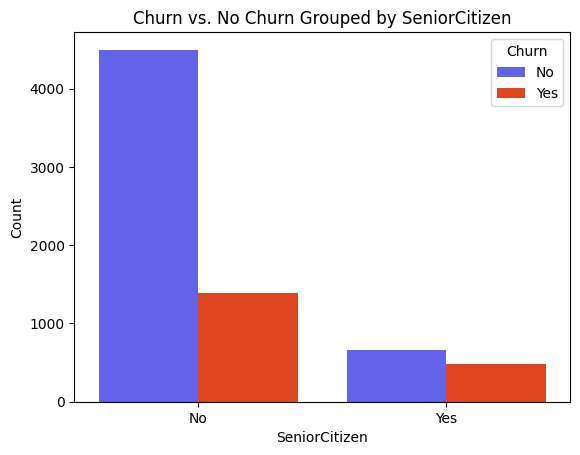

In [125]:
feature = 'SeniorCitizen'
display(data.groupby([feature, 'Churn']).size())
sns.countplot(data=data, x=feature, hue='Churn', palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Churn vs. No Churn Grouped by {feature}')
plt.show()

In [126]:
SeniorCitizen_grouped = data.groupby(['SeniorCitizen', 'Churn', 'gender']).size().reset_index(name='Count')
SeniorCitizen_grouped

,SeniorCitizen,Churn,gender,Count
0,No,No,Female,2216
1,No,No,Male,2281
2,No,Yes,Female,699
3,No,Yes,Male,694
4,Yes,No,Female,328
5,Yes,No,Male,338
6,Yes,Yes,Female,240
7,Yes,Yes,Male,236


The above data tells us that senior citizens are more likely to churn.

#### `Partner`

Partner  Churn
No       No       2439
         Yes      1200
Yes      No       2724
         Yes       669
dtype: int64

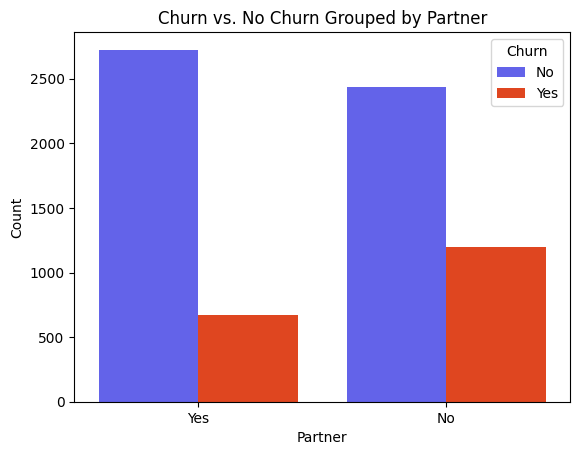

In [127]:
feature = 'Partner'
display(data.groupby([feature, 'Churn']).size())
sns.countplot(data=data, x=feature, hue='Churn', palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Churn vs. No Churn Grouped by {feature}')
plt.show()

We see that within customers having no partners, there are nearly 50% churners.

#### `Dependents`

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1773
            Yes       326
dtype: int64

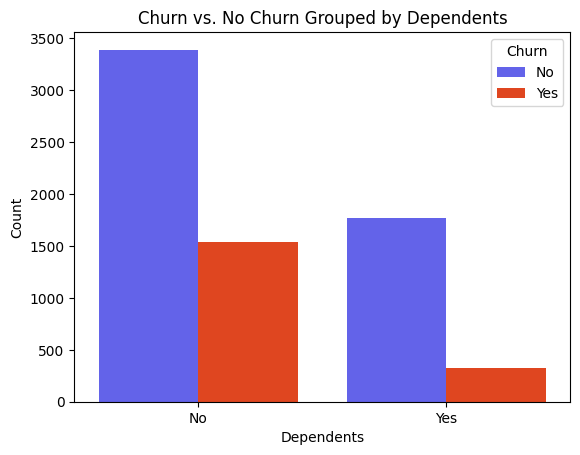

In [128]:
feature = 'Dependents'
display(data.groupby([feature, 'Churn']).size())
sns.countplot(data=data, x=feature, hue='Churn', palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Churn vs. No Churn Grouped by {feature}')
plt.show()

Similar to `Partners`, it seems that if the customer has no `Depnedents` there is nearly a 50% chance that they Churn.

It should also be noted that there are more customers without dependents than customers with no partners.

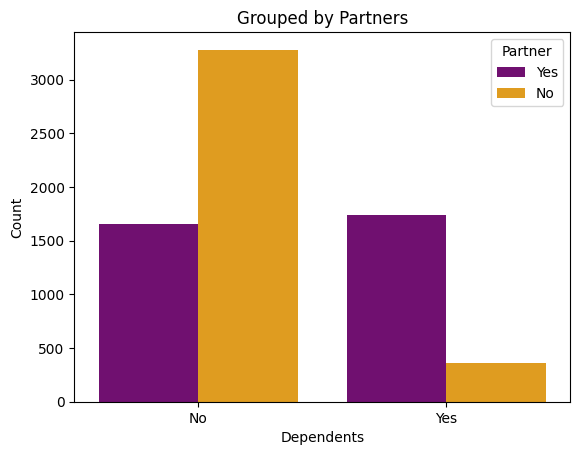

In [129]:
sns.countplot(data=data, x='Dependents', hue='Partner', palette=['purple', 'orange'])
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Grouped by Partners')
plt.show()

If there is a depndent, there is a hgh chance that its a partner. But if they have no dependent, there is still around 50% chance that they have a partner. So neither feature cannot be removed.

### Charges and Contracts demographic

#### `Contract`

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1306
                Yes       166
Two year        No       1637
                Yes        48
dtype: int64

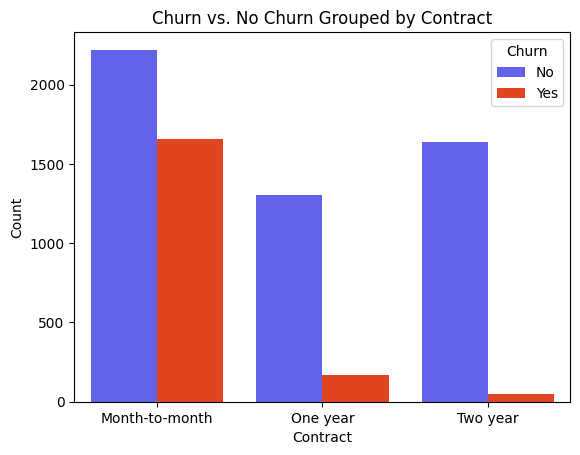

In [130]:
feature = 'Contract'
display(data.groupby([feature, 'Churn']).size())
sns.countplot(data=data, x=feature, hue='Churn', palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Churn vs. No Churn Grouped by {feature}')
plt.show()


As one migght expect, there are more churners amongst customers having Monthly contract.

#### `tenure`

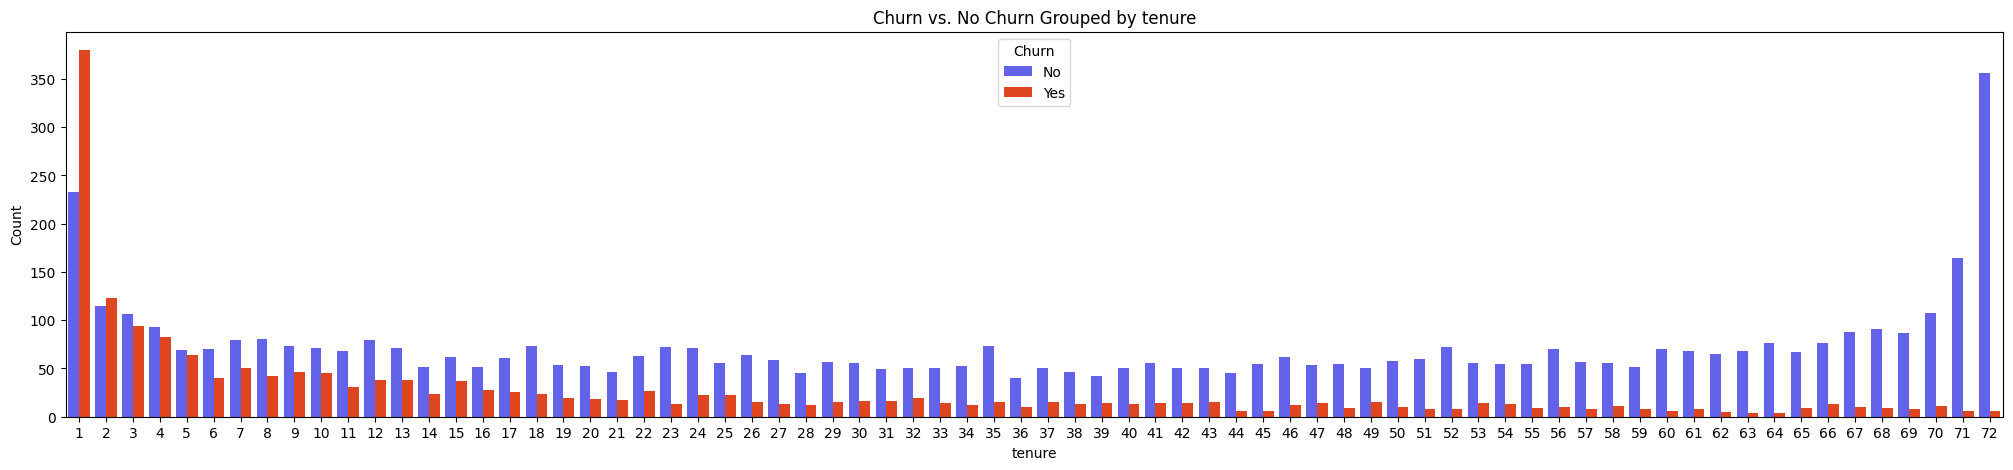

In [131]:
feature = 'tenure'
#display(data.groupby([feature, 'Churn']).size())
plt.figure(figsize=(25,5))
sns.countplot(data=data, x=feature, hue='Churn', palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Churn vs. No Churn Grouped by {feature}')
plt.show()

The peope who churned after one month of usage could be people testing the provider. It could also be that these customers shifted from another provider and did not like the services or quality offered and decided to Churn, in a comparitive sense. 

The Tenure feature does offer us the insight that the longer a customer stays with the brand, the less likely he is to Churn. But we must be careful in using this feature to predict churners, as everyone who has churned later has also crossed the first month without churning. That is, if a person has just completed one month with the company, it does not mean that, that is a reason for the person to leave the company. He might ofcourse leave the company due to otehr factors such as the services or quality offered, but, ot because he has been with the company for one month. On the other hand, it is logical to say that if a customer has been with the company for over 3 years, it is a strong indicator that he is less likely to churn. The entire first month churners could in that sense be though of as outlers in comparison with the remaining customers.

To understand the CHurners in the first month we must consider other features and variables that might play a significant role in predicting churn. These could include service quality, customer complaints, pricing, competitive offerings, demographics, etc. Incorporating these variables along with tenure can lead to a more robust and accurate churn prediction model. The given data does not have these information.

There is also a chance that the sudden jump in the 72nd month (almsot doule that in the 71st month) could be because the dataset is limited to 6 years data, and the longest tenure (72 months), icludes customers who have stayed even longer. Also, having higher nuber of non churners in the initial months compare to the subsequent months could also mean the customers are trying it out for a few onths before finalising their decision to Churn.

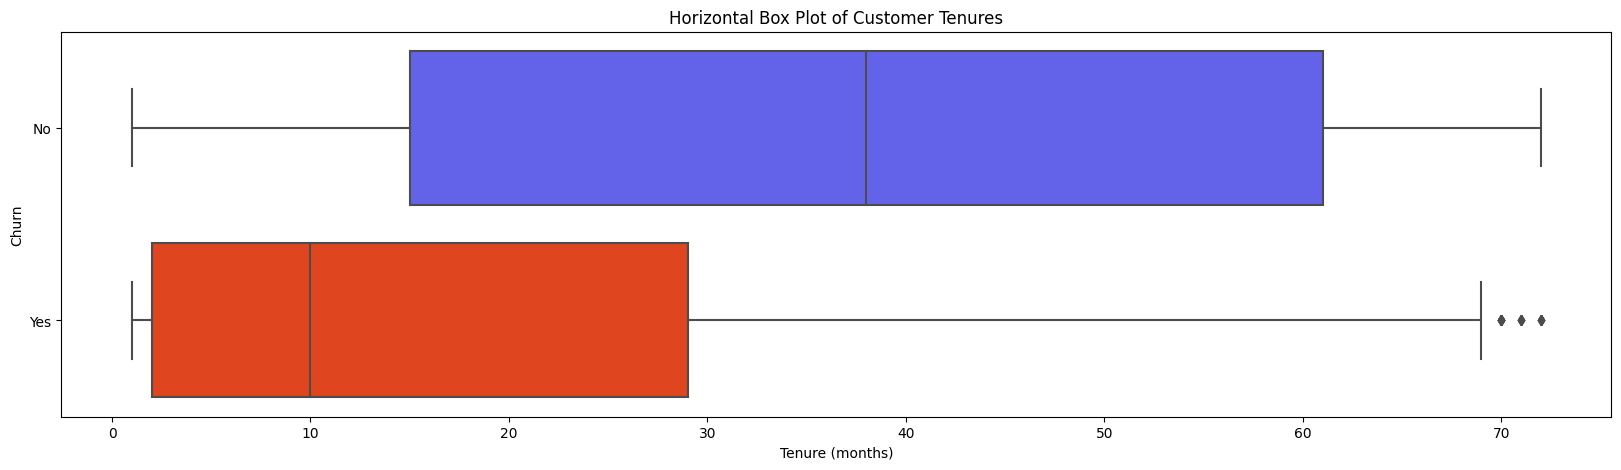

In [132]:
# Box Plot
plt.figure(figsize=(20, 5))
sns.boxplot(x='tenure', y='Churn', data=data, palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.xlabel('Tenure (months)')
plt.ylabel('Churn')
plt.title('Horizontal Box Plot of Customer Tenures')
plt.show()

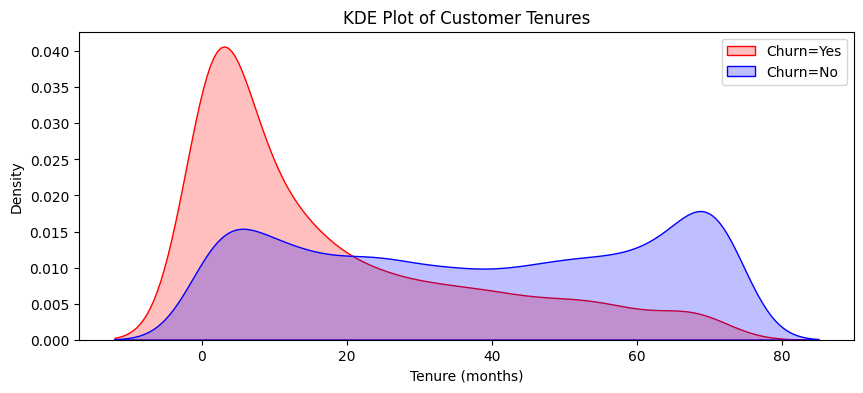

In [133]:
# KDE Plot
plt.figure(figsize=(10, 4))
sns.kdeplot(data[data['Churn'] == 'Yes']['tenure'], label='Churn=Yes', fill=True, color='red')
sns.kdeplot(data[data['Churn'] == 'No']['tenure'], label='Churn=No', fill=True, color='blue')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.title('KDE Plot of Customer Tenures')
plt.show()

We can see that the non churners are evenly distributed except for the shortest and longest tenures, but the churners have outliers and is at the same time right skewed.

Checking normalised and standardised Tenure distributions

In [134]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
data['tenure_standardized'] = scaler.fit_transform(data[['tenure']])

scaler = MinMaxScaler()
data['tenure_normalized'] = scaler.fit_transform(data[['tenure']])

data['tenure_log'] = np.log1p(data['tenure'])

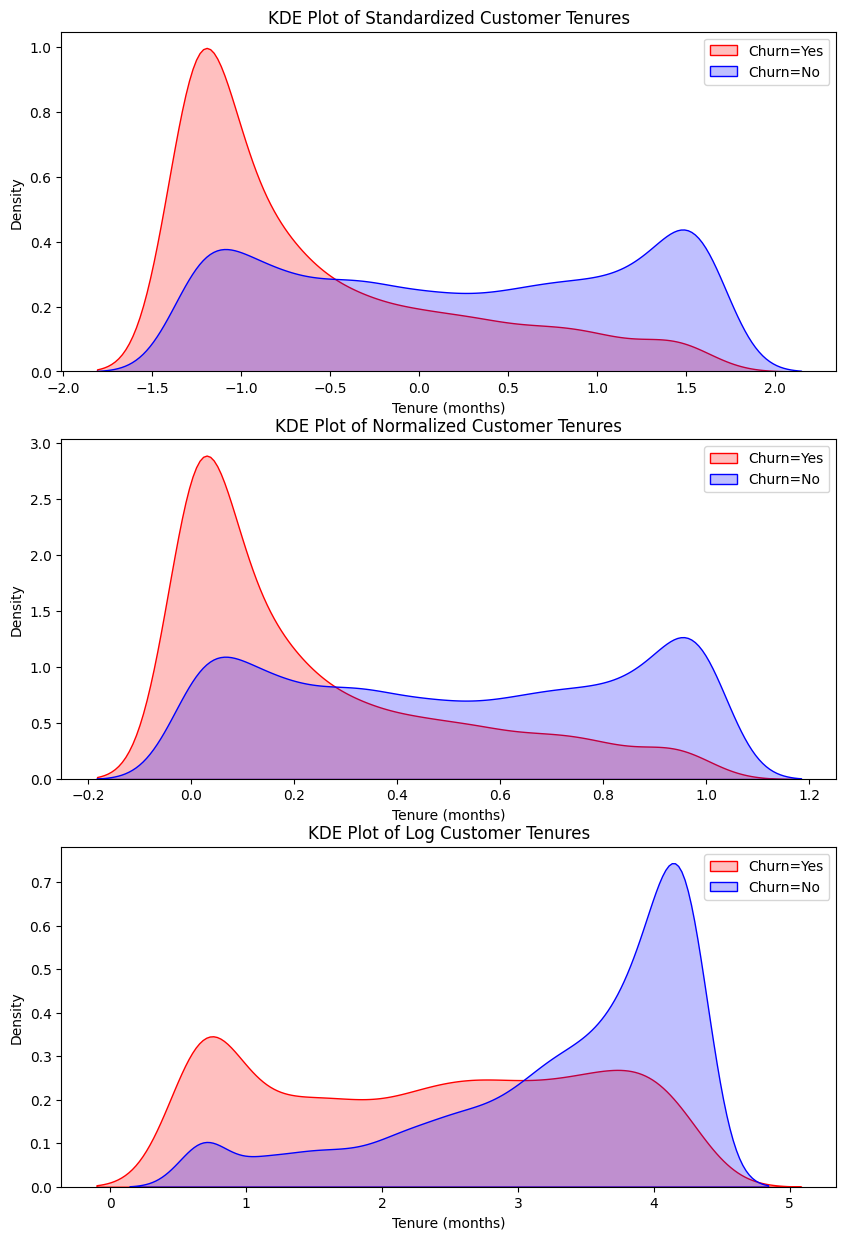

In [135]:
plt.figure(figsize=(10, 15))

plt.subplot(311)
sns.kdeplot(data[data['Churn'] == 'Yes']['tenure_standardized'], label='Churn=Yes', fill=True, color='red')
sns.kdeplot(data[data['Churn'] == 'No']['tenure_standardized'], label='Churn=No', fill=True, color='blue')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.title('KDE Plot of Standardized Customer Tenures')

plt.subplot(312)
sns.kdeplot(data[data['Churn'] == 'Yes']['tenure_normalized'], label='Churn=Yes', fill=True, color='red')
sns.kdeplot(data[data['Churn'] == 'No']['tenure_normalized'], label='Churn=No', fill=True, color='blue')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.title('KDE Plot of Normalized Customer Tenures')

plt.subplot(313)
sns.kdeplot(data[data['Churn'] == 'Yes']['tenure_log'], label='Churn=Yes', fill=True, color='red')
sns.kdeplot(data[data['Churn'] == 'No']['tenure_log'], label='Churn=No', fill=True, color='blue')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.title('KDE Plot of Log Customer Tenures')

plt.show()

In [136]:
data.drop(['tenure_standardized', 'tenure_normalized', 'tenure_log'], axis=1, inplace=True)

In [137]:
# tenure_bins=12
# bin_size = int(data['tenure'].max()/tenure_bins)
# tenure_dict = {}
# for i in range(tenure_bins):
#     tenure_dict['{} - {}'.format((i+1)*bin_size-bin_size+1, (i+1)*bin_size)]=list(range((i+1)*bin_size-bin_size+1, (i+1)*bin_size+1))

# def get_tenure_range(tenure):
#     for key, values in tenure_dict.items():
#         if tenure in values:
#             return key
#     return None

# data['tenure_range']=data['tenure'].apply(get_tenure_range)

In [138]:
tenure_bins=6
bin_size = int(data['tenure'].max()/tenure_bins)
labels = ['{}-{}'.format(i, i+bin_size-1) for i in range(1,data['tenure'].max(), bin_size)]
data['tenure_range']=pd.cut(data['tenure'], bins=range(1,data['tenure'].max()+bin_size,bin_size), right=False, labels=labels)

tenure_range  Churn
1-12          No       1138
              Yes      1037
13-24         No        730
              Yes       294
25-36         No        652
              Yes       180
37-48         No        617
              Yes       145
49-60         No        712
              Yes       120
61-72         No       1314
              Yes        93
dtype: int64

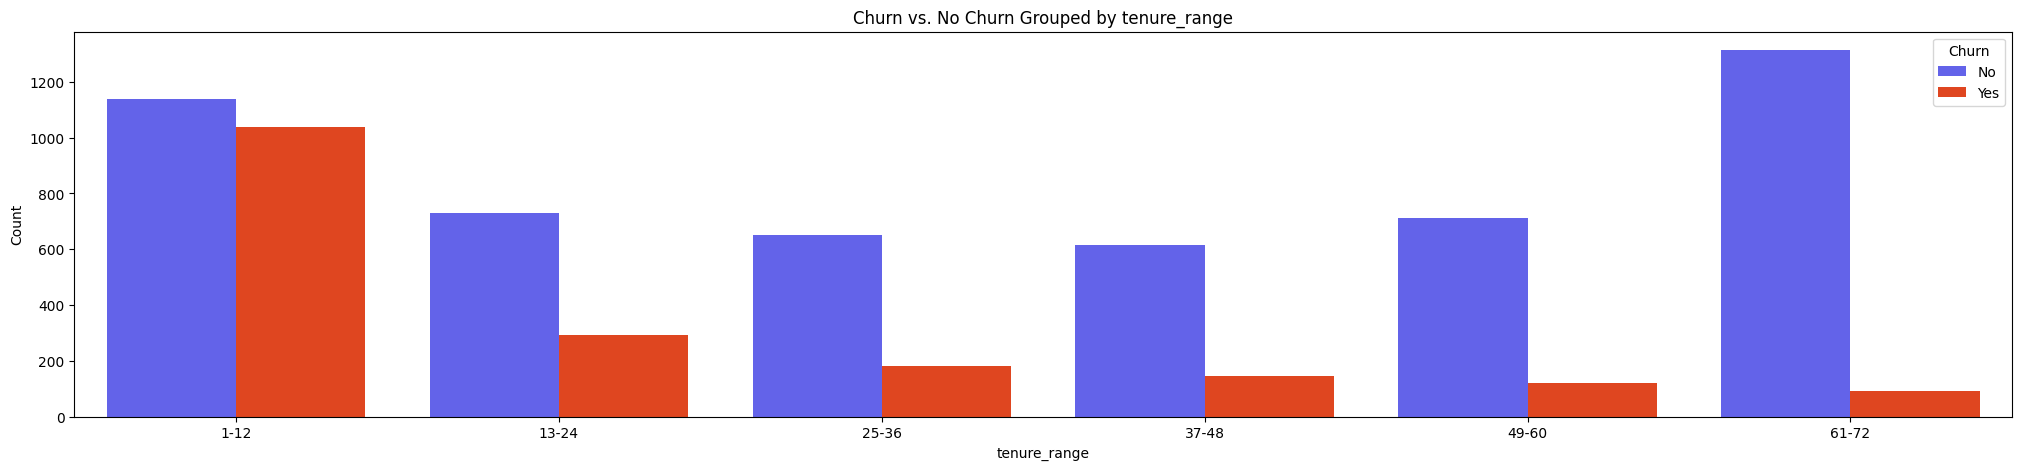

In [139]:
feature = 'tenure_range'
display(data.groupby([feature, 'Churn']).size())
plt.figure(figsize=(25,5))
sns.countplot(data=data, x=feature, hue='Churn', palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Churn vs. No Churn Grouped by {feature}')
plt.show()

tenure_range  Churn
1-6           No       686
              Yes      784
7-12          No       452
              Yes      253
13-18         No       371
              Yes      177
19-24         No       359
              Yes      117
25-30         No       337
              Yes       94
31-36         No       315
              Yes       86
37-42         No       296
              Yes       83
43-48         No       321
              Yes       62
49-54         No       352
              Yes       68
55-60         No       360
              Yes       52
61-66         No       420
              Yes       43
67-72         No       894
              Yes       50
dtype: int64

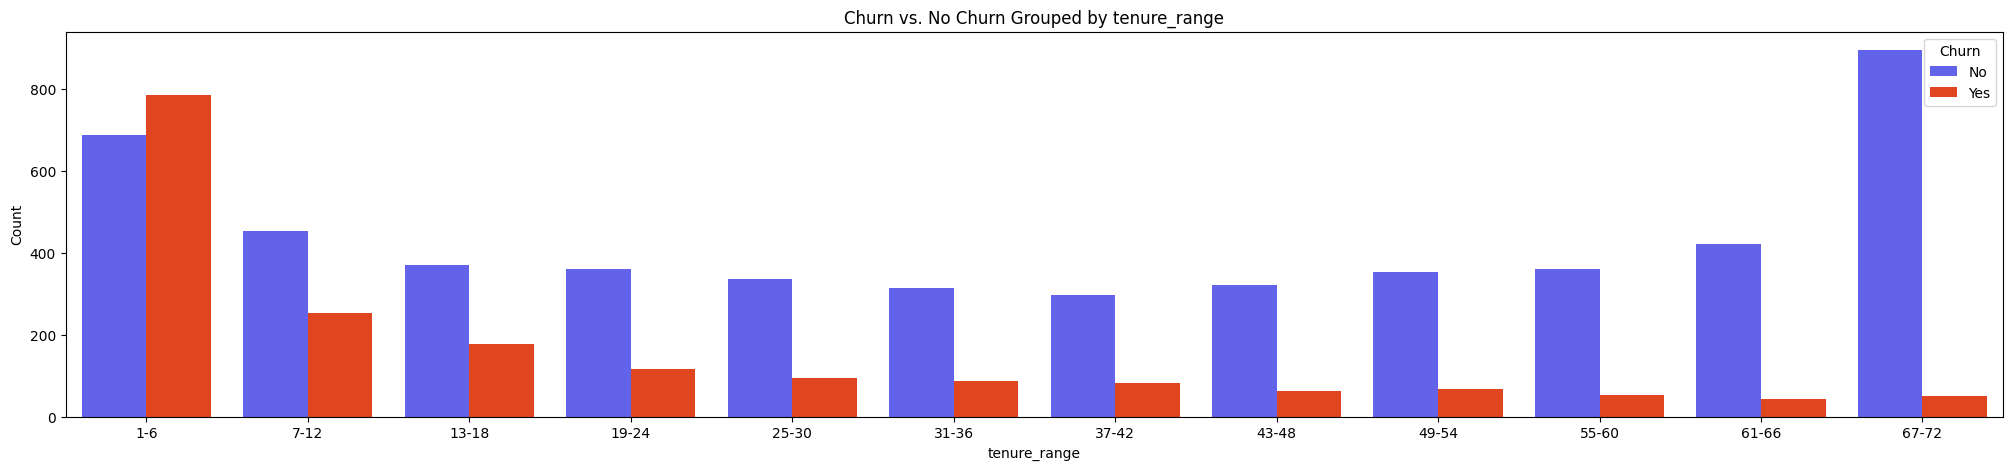

In [140]:
tenure_bins=12
bin_size = int(data['tenure'].max()/tenure_bins)
labels = ['{}-{}'.format(i, i+bin_size-1) for i in range(1,data['tenure'].max(), bin_size)]
data['tenure_range']=pd.cut(data['tenure'], bins=range(1,data['tenure'].max()+bin_size,bin_size), right=False, labels=labels)
feature = 'tenure_range'
display(data.groupby([feature, 'Churn']).size())
plt.figure(figsize=(25,5))
sns.countplot(data=data, x=feature, hue='Churn', palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Churn vs. No Churn Grouped by {feature}')
plt.show()

We can try the effect of removing tenures 1 month and 72 months

In [141]:
data1 = data.copy()
data1 = data1[(data1['tenure']!=1) & (data1['tenure']!=72)]


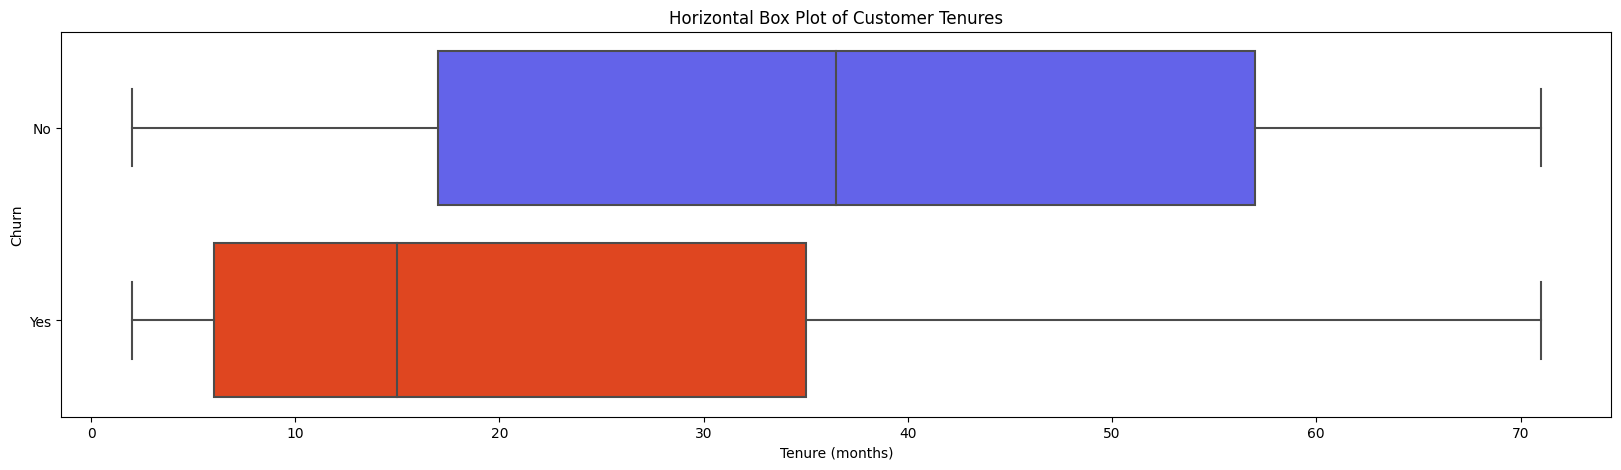

In [142]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='tenure', y='Churn', data=data1, palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.xlabel('Tenure (months)')
plt.ylabel('Churn')
plt.title('Horizontal Box Plot of Customer Tenures')
plt.show()

tenure_range  Churn
1-6           No       453
              Yes      404
7-12          No       452
              Yes      253
13-18         No       371
              Yes      177
19-24         No       359
              Yes      117
25-30         No       337
              Yes       94
31-36         No       315
              Yes       86
37-42         No       296
              Yes       83
43-48         No       321
              Yes       62
49-54         No       352
              Yes       68
55-60         No       360
              Yes       52
61-66         No       420
              Yes       43
67-72         No       538
              Yes       44
dtype: int64

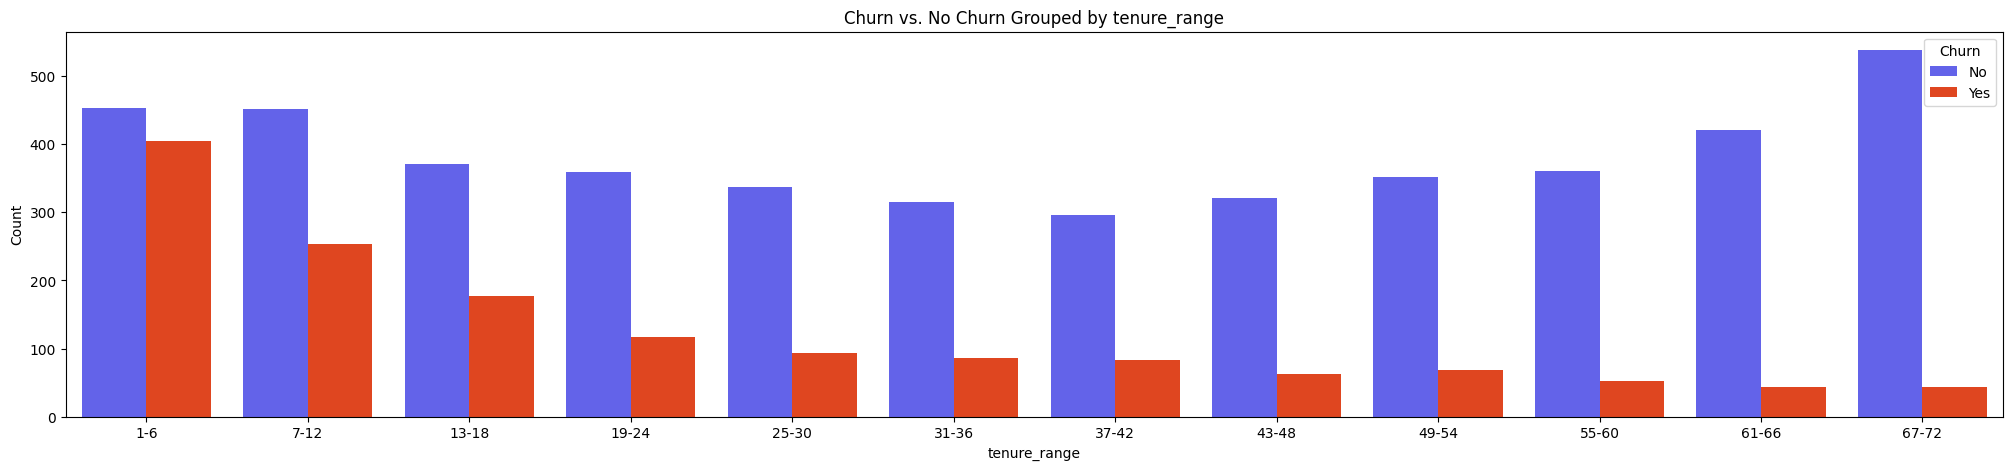

In [143]:
feature = 'tenure_range'
display(data1.groupby([feature, 'Churn']).size())
plt.figure(figsize=(25,5))
sns.countplot(data=data1, x=feature, hue='Churn', palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Churn vs. No Churn Grouped by {feature}')
plt.show()

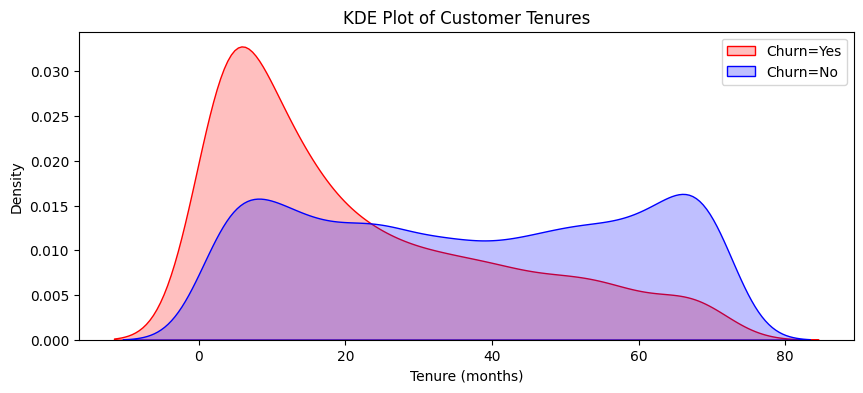

In [144]:
# KDE Plot
plt.figure(figsize=(10, 4))
sns.kdeplot(data1[data1['Churn'] == 'Yes']['tenure'], label='Churn=Yes', fill=True, color='red')
sns.kdeplot(data1[data1['Churn'] == 'No']['tenure'], label='Churn=No', fill=True, color='blue')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.title('KDE Plot of Customer Tenures')
plt.show()

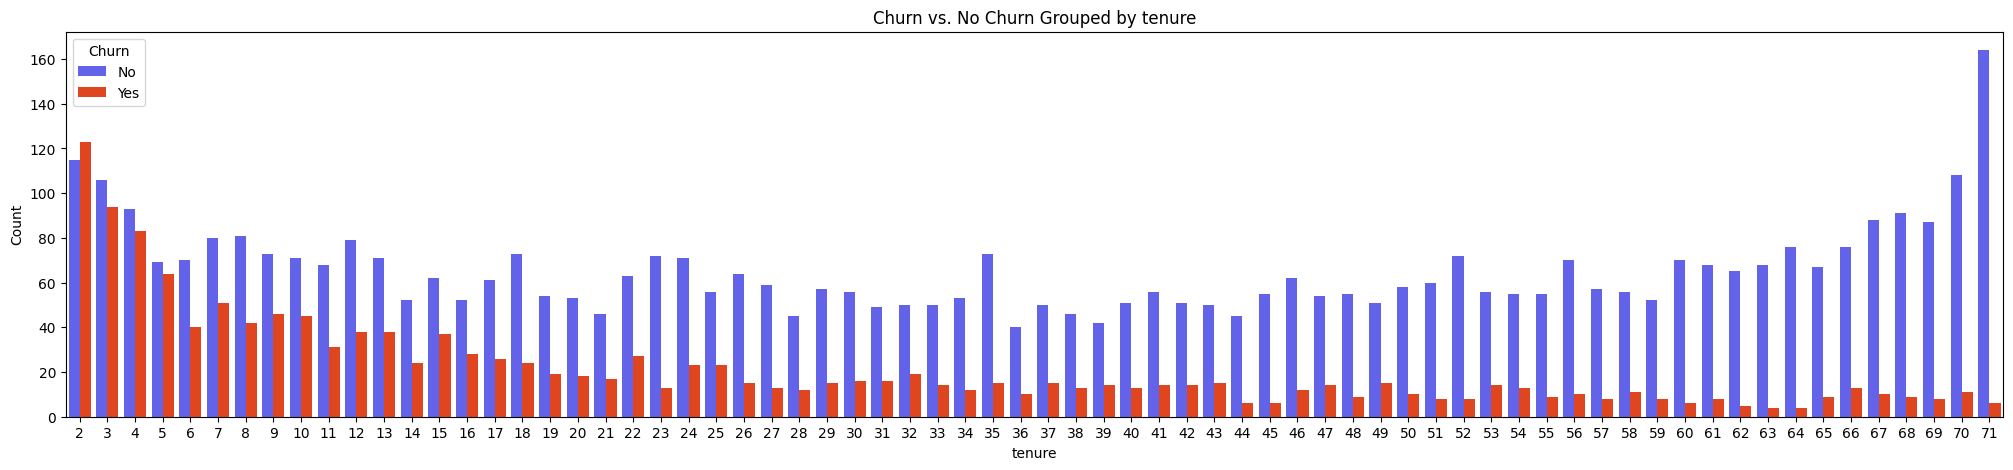

In [145]:
feature = 'tenure'
#display(data.groupby([feature, 'Churn']).size())
plt.figure(figsize=(25,5))
sns.countplot(data=data1, x=feature, hue='Churn', palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Churn vs. No Churn Grouped by {feature}')
plt.show()

#### `MonthlyCharges`

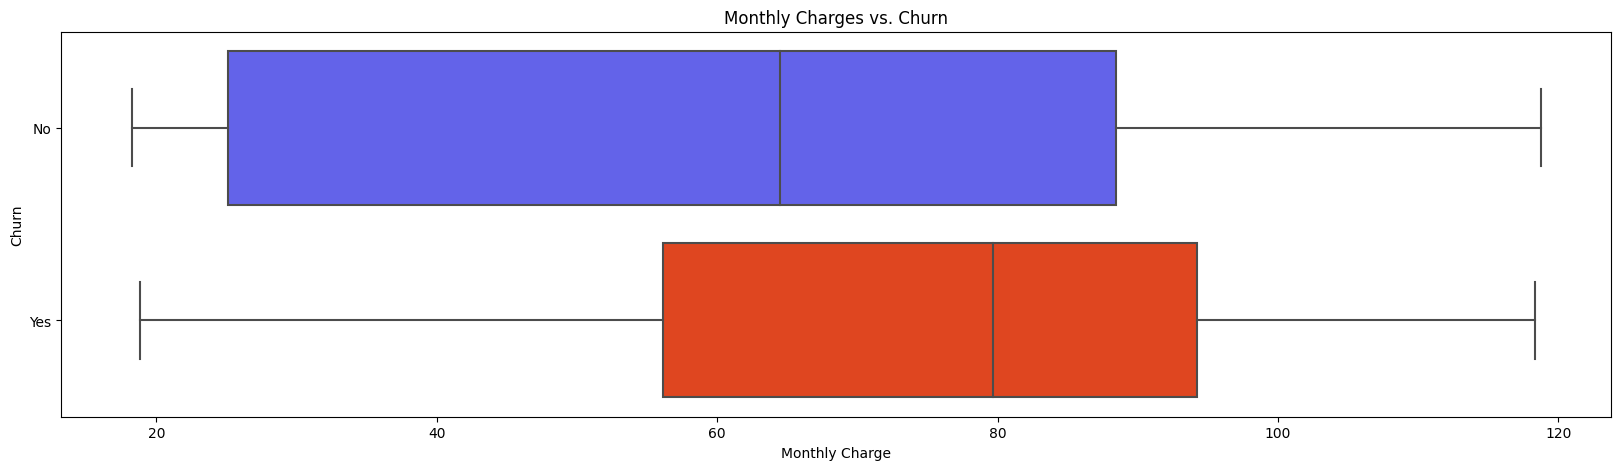

In [146]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='MonthlyCharges', y='Churn', data=data, palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.title('Monthly Charges vs. Churn')
plt.xlabel('Monthly Charge')
plt.ylabel('Churn')
plt.show()

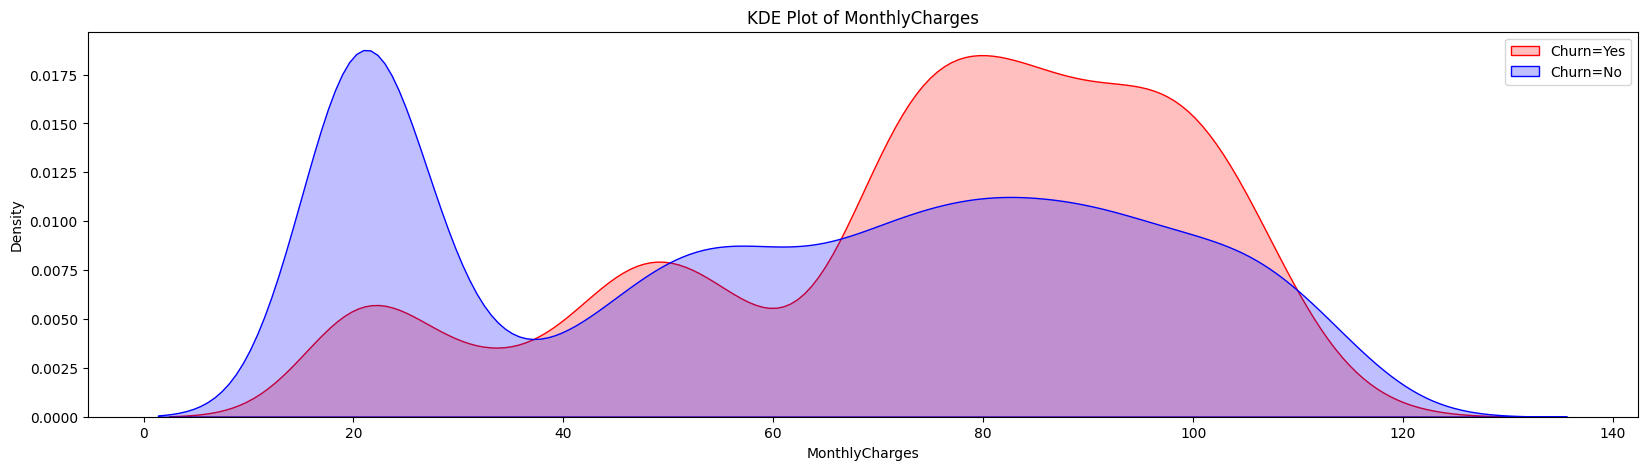

In [147]:
# KDE Plot
plt.figure(figsize=(20, 5))
sns.kdeplot(data[data['Churn'] == 'Yes']['MonthlyCharges'], label='Churn=Yes', fill=True, color='red')
sns.kdeplot(data[data['Churn'] == 'No']['MonthlyCharges'], label='Churn=No', fill=True, color='blue')
plt.xlabel('MonthlyCharges')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.title('KDE Plot of MonthlyCharges')
plt.show()

#### `TotalCharges`

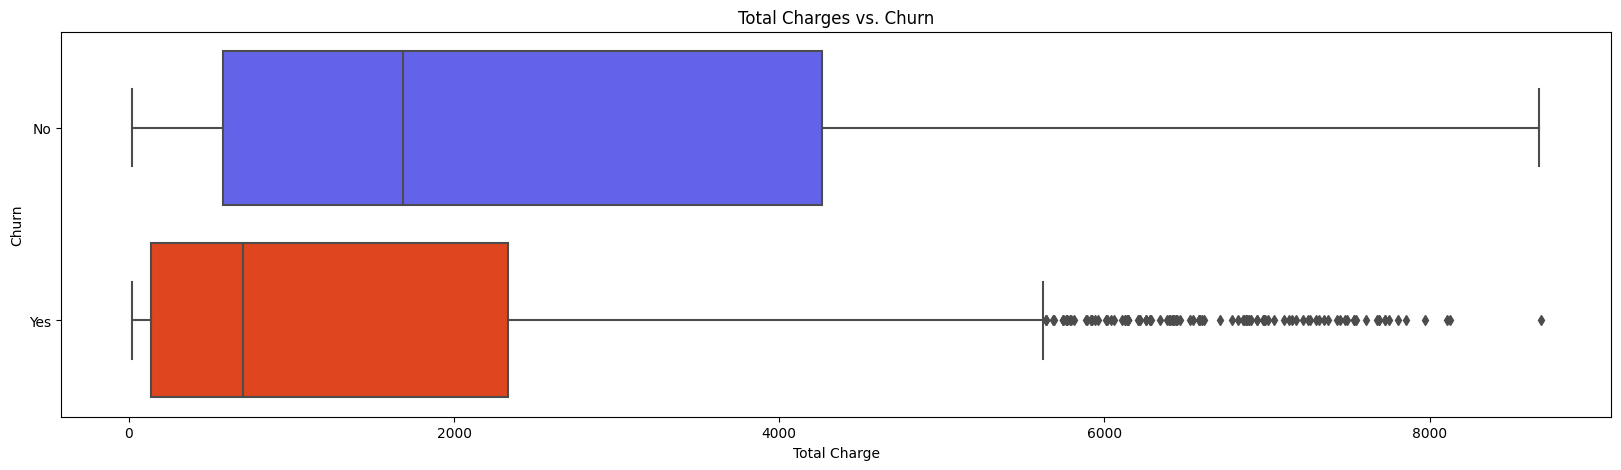

In [148]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='TotalCharges', y='Churn', data=data, palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.title('Total Charges vs. Churn')
plt.xlabel('Total Charge')
plt.ylabel('Churn')
plt.show()

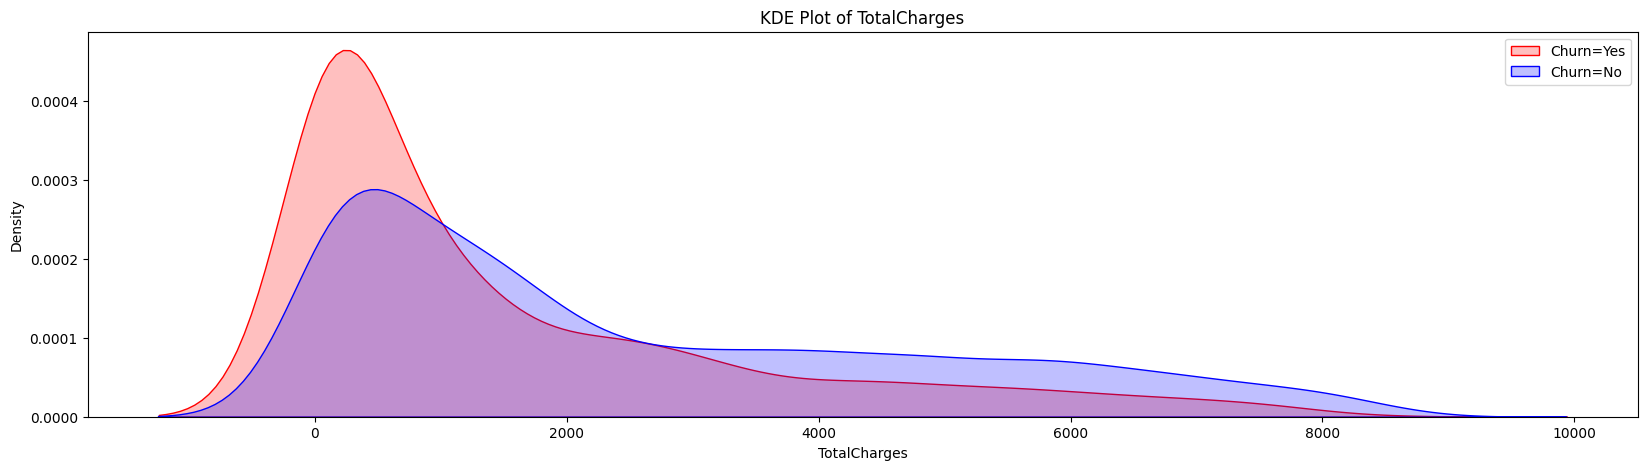

In [149]:
# KDE Plot
plt.figure(figsize=(20, 5))
sns.kdeplot(data[data['Churn'] == 'Yes']['TotalCharges'], label='Churn=Yes', fill=True, color='red')
sns.kdeplot(data[data['Churn'] == 'No']['TotalCharges'], label='Churn=No', fill=True, color='blue')
plt.xlabel('TotalCharges')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.title('KDE Plot of TotalCharges')
plt.show()

In [150]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


We can see that TotalCharges is the Total amount the customers have paid during their tenure. So we observe that there are more churners with lower Total CHarges as they have been with the company for a shorter Tenure.

The MonthlyCharge might refer to the average monthly cost or their current monthhy plan. We can check how the TotalCharges averaged over their Tenure affect

In [151]:
data['AverageCharge']=data['TotalCharges']/data['tenure']

In [152]:
data['AverageCharge'].head()

0    29.850000
1    55.573529
2    54.075000
3    40.905556
4    75.825000
Name: AverageCharge, dtype: float64

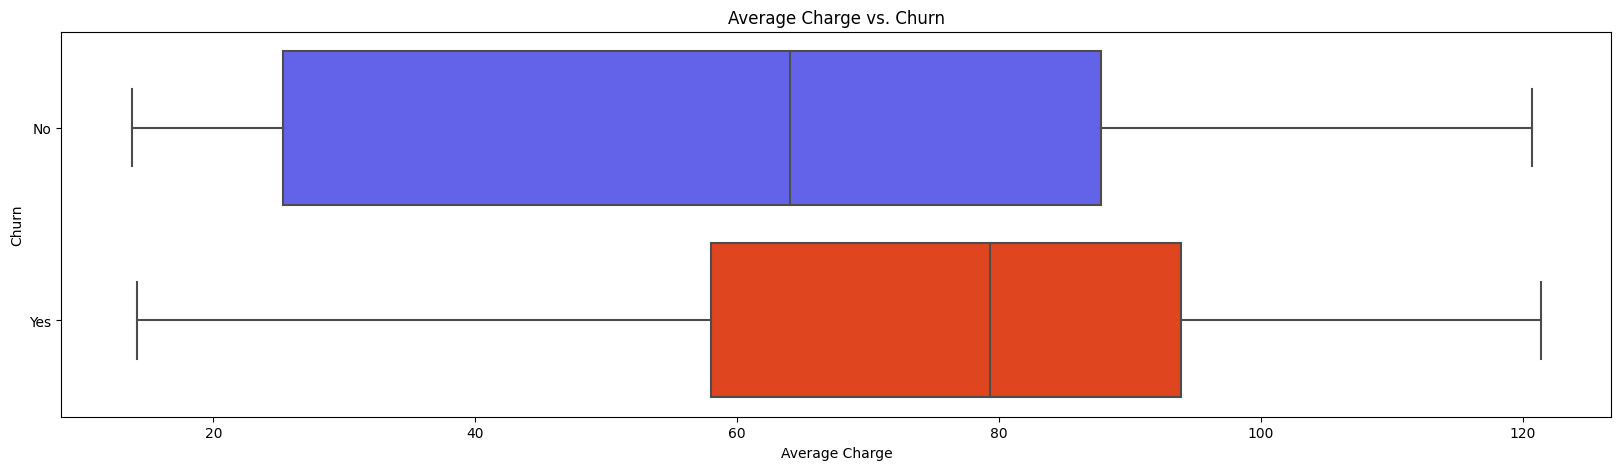

In [153]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='AverageCharge', y='Churn', data=data, palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.title('Average Charge vs. Churn')
plt.xlabel('Average Charge')
plt.ylabel('Churn')
plt.show()

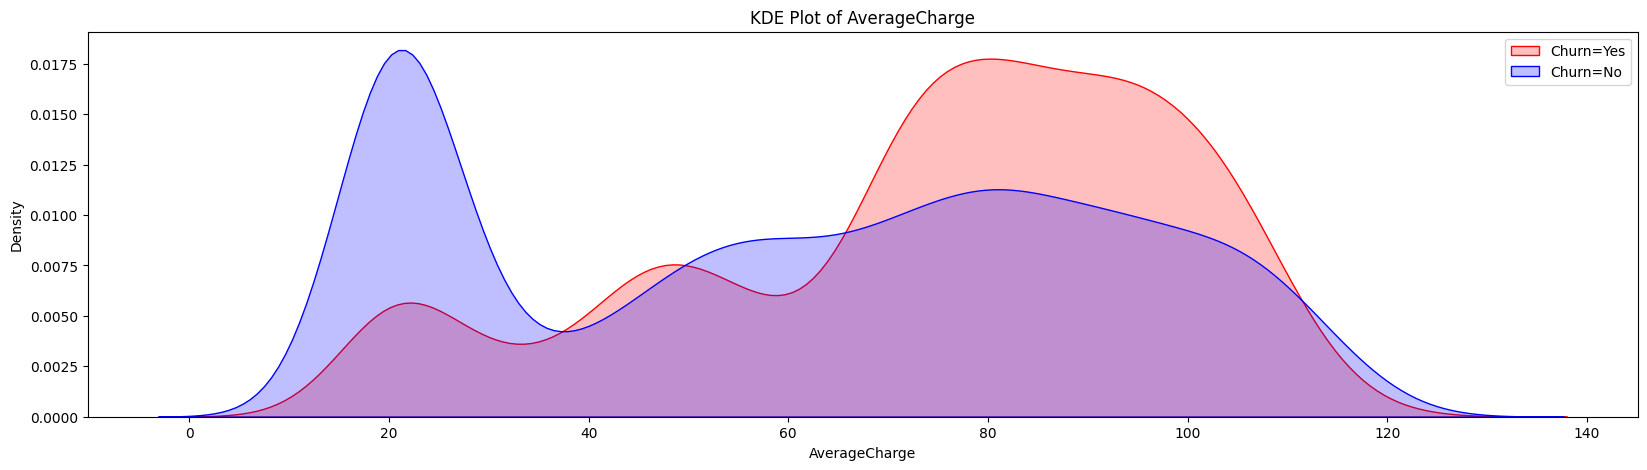

In [154]:
# KDE Plot
plt.figure(figsize=(20, 5))
sns.kdeplot(data[data['Churn'] == 'Yes']['AverageCharge'], label='Churn=Yes', fill=True, color='red')
sns.kdeplot(data[data['Churn'] == 'No']['AverageCharge'], label='Churn=No', fill=True, color='blue')
plt.xlabel('AverageCharge')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.title('KDE Plot of AverageCharge')
plt.show()

In [155]:
data['AverageCharge'].corr(data['MonthlyCharges'])

0.996237312390775

We can see that its almost the same as the monthly Charges feature

#### `PaperlessBilling` and `PaymentMethod`

PaperlessBilling  Churn
No                No       2395
                  Yes       469
Yes               No       2768
                  Yes      1400
dtype: int64

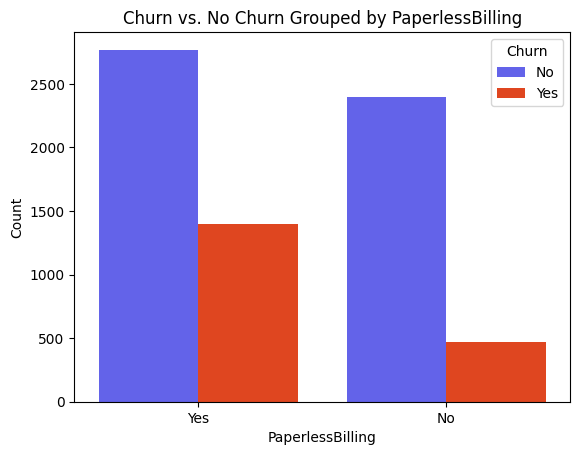

In [156]:
feature = 'PaperlessBilling'
display(data.groupby([feature, 'Churn']).size())
sns.countplot(data=data, x=feature, hue='Churn', palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Churn vs. No Churn Grouped by {feature}')
plt.show()

We see that customers who use 'PaperlessBilling' are more likely to churn

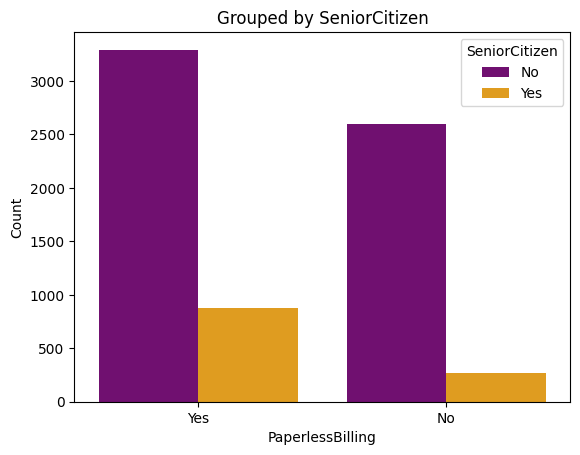

In [157]:
sns.countplot(data=data, x='PaperlessBilling', hue='SeniorCitizen', palette=['purple', 'orange'])
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.title('Grouped by SeniorCitizen')
plt.show()

PaymentMethod              Churn
Bank transfer (automatic)  No       1284
                           Yes       258
Credit card (automatic)    No       1289
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1296
                           Yes       308
dtype: int64

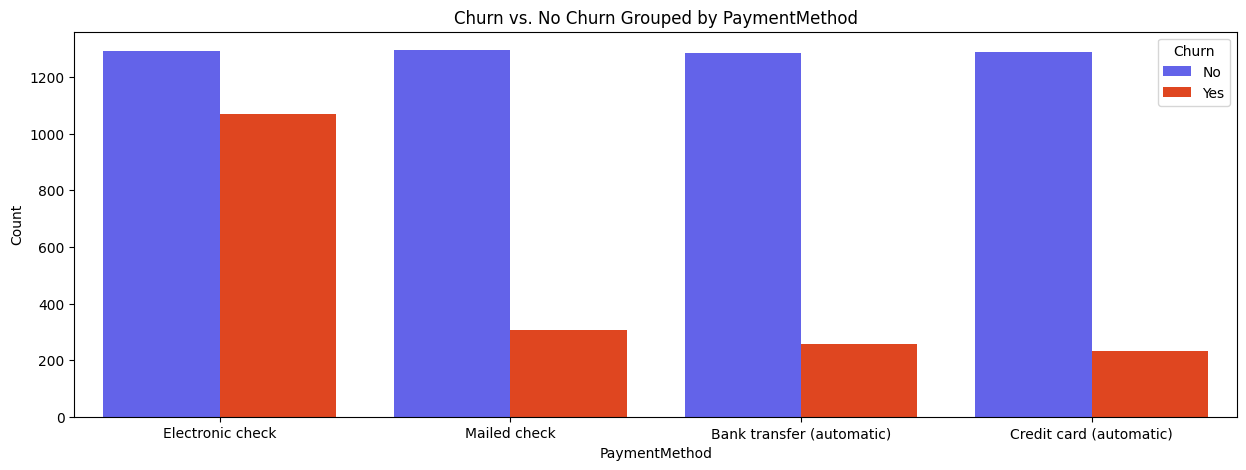

In [158]:
feature = 'PaymentMethod'
display(data.groupby([feature, 'Churn']).size())
plt.figure(figsize=(15,5))
sns.countplot(data=data, x=feature, hue='Churn', palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Churn vs. No Churn Grouped by {feature}')
plt.show()

We can see that Customers who pay using Electronic check has the highest number of Churners.

It is also interesting that the data set contains rougly the same amount of Non Churners for each mode of payment. That is non Churning customers equally prefer each mode of payment. This might be due to some error in data collection.

#### `PhoneService` and `MultipleLines`

PhoneService  Churn
No            No        510
              Yes       170
Yes           No       4653
              Yes      1699
dtype: int64

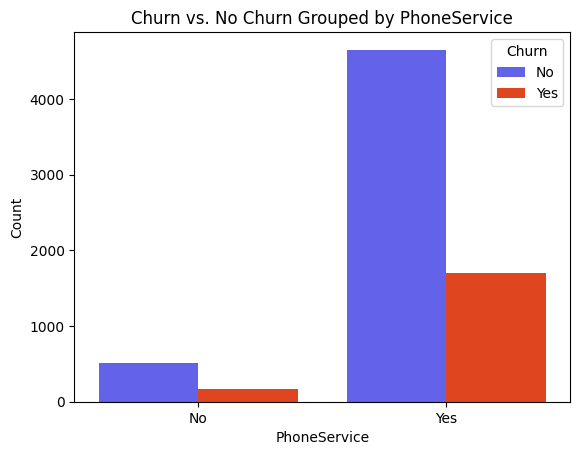

In [159]:
feature = 'PhoneService'
display(data.groupby([feature, 'Churn']).size())
sns.countplot(data=data, x=feature, hue='Churn', palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Churn vs. No Churn Grouped by {feature}')
plt.show()

In [160]:
print("Percentage of churners without PhoneService: {}".format(100*data.groupby(['PhoneService', 'Churn']).size()[1]/data.groupby(['PhoneService']).size()[0]))
print("Percentage of churners with PhoneService: {}".format(round(100*data.groupby(['PhoneService', 'Churn']).size()[3]/data.groupby(['PhoneService']).size()[1], 2)))

Percentage of churners without PhoneService: 25.0
Percentage of churners with PhoneService: 26.75


MultipleLines     Churn
No                No       2536
                  Yes       849
No phone service  No        510
                  Yes       170
Yes               No       2117
                  Yes       850
dtype: int64

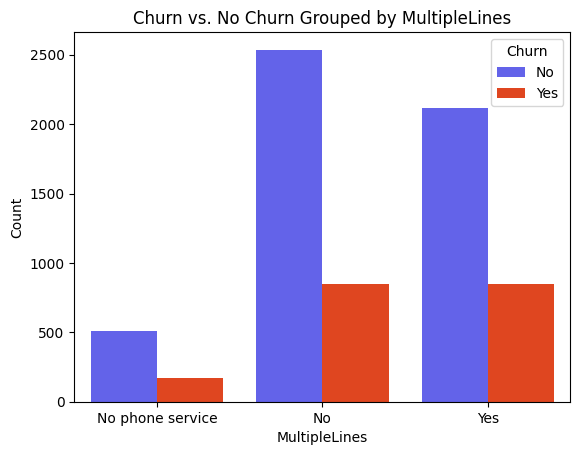

In [161]:
feature = 'MultipleLines'
display(data.groupby([feature, 'Churn']).size())
sns.countplot(data=data, x=feature, hue='Churn', palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Churn vs. No Churn Grouped by {feature}')
plt.show()

The data shows that Custmer with PhoneService and MultipleLines are more likely to Churn
We can check how this feature affects prediction during feature selection.

#### `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV` and `StreamingMovies`

InternetService  Churn
DSL              No       1957
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1407
                 Yes       113
dtype: int64

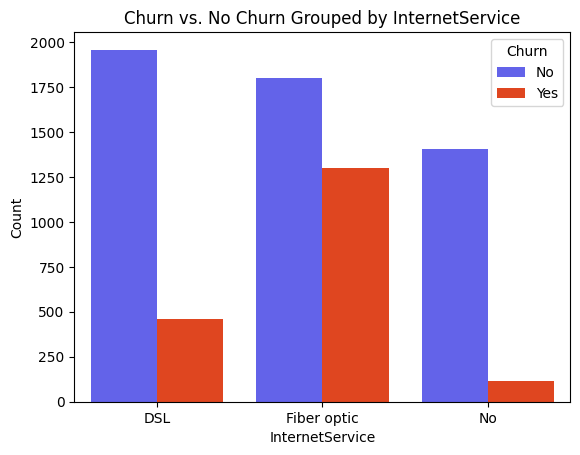

In [162]:
feature = 'InternetService'
display(data.groupby([feature, 'Churn']).size())
sns.countplot(data=data, x=feature, hue='Churn', palette=[(0.3, 0.3, 1), (1,0.2, 0)])
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Churn vs. No Churn Grouped by {feature}')
plt.show()

The data shows that Fiber optic users have higher number of churners.

OnlineSecurity       Churn
No                   No       2036
                     Yes      1461
No internet service  No       1407
                     Yes       113
Yes                  No       1720
                     Yes       295
dtype: int64

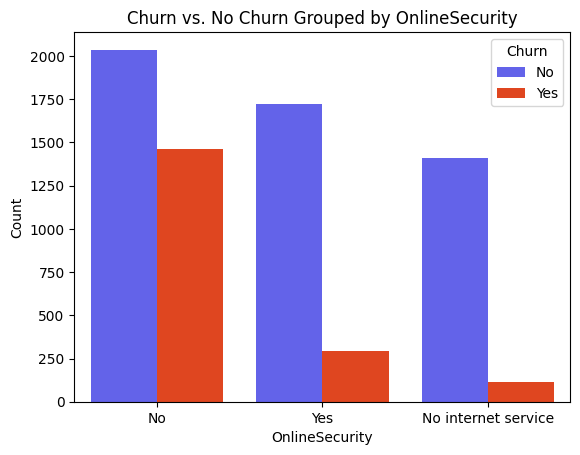

OnlineBackup         Churn
No                   No       1854
                     Yes      1233
No internet service  No       1407
                     Yes       113
Yes                  No       1902
                     Yes       523
dtype: int64

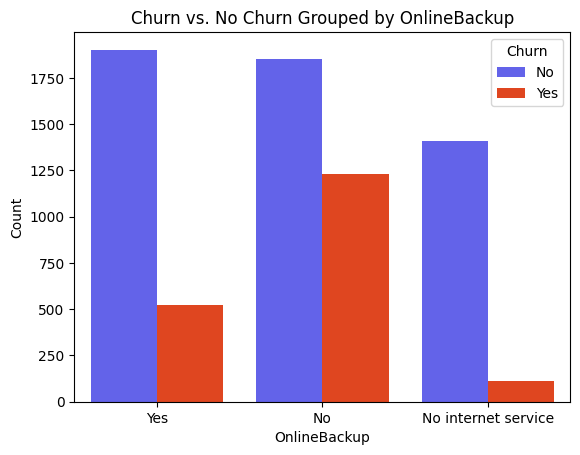

DeviceProtection     Churn
No                   No       1883
                     Yes      1211
No internet service  No       1407
                     Yes       113
Yes                  No       1873
                     Yes       545
dtype: int64

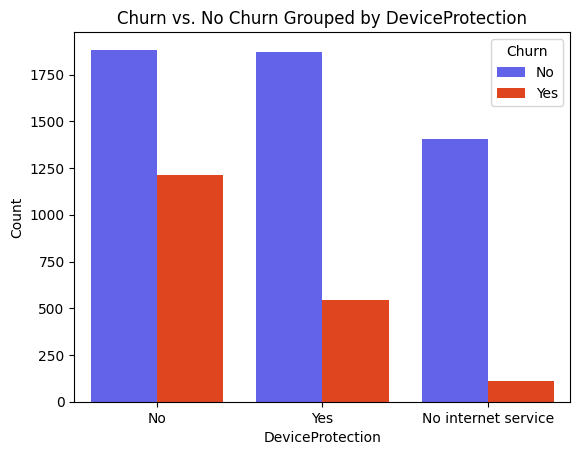

TechSupport          Churn
No                   No       2026
                     Yes      1446
No internet service  No       1407
                     Yes       113
Yes                  No       1730
                     Yes       310
dtype: int64

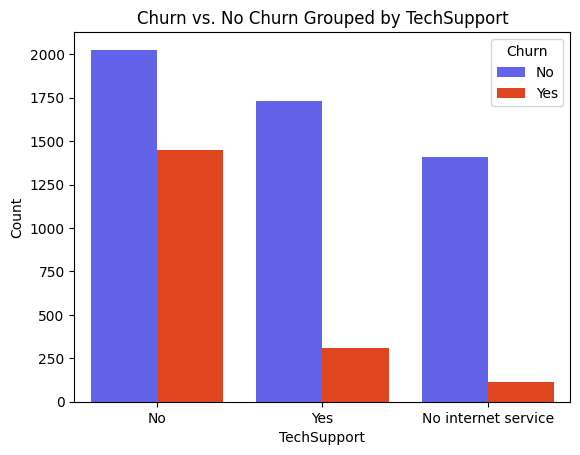

StreamingTV          Churn
No                   No       1867
                     Yes       942
No internet service  No       1407
                     Yes       113
Yes                  No       1889
                     Yes       814
dtype: int64

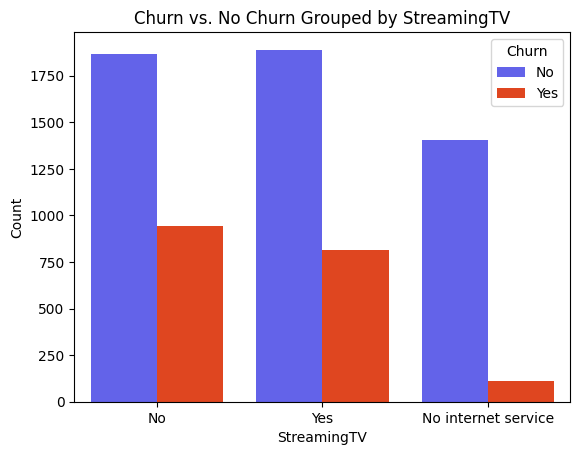

StreamingMovies      Churn
No                   No       1843
                     Yes       938
No internet service  No       1407
                     Yes       113
Yes                  No       1913
                     Yes       818
dtype: int64

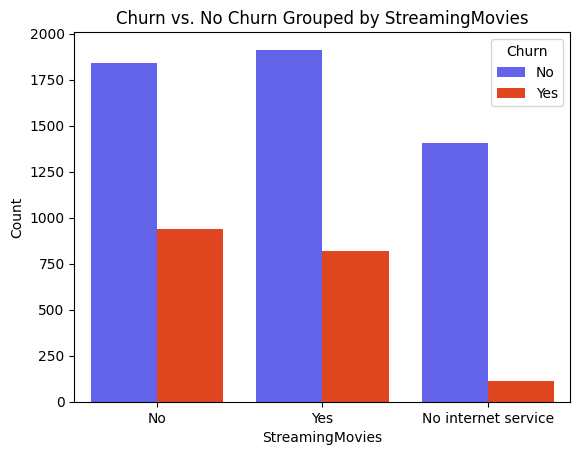

In [163]:
features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for feature in features:
    display(data.groupby([feature, 'Churn']).size())
    sns.countplot(data=data, x=feature, hue='Churn', palette=[(0.3, 0.3, 1), (1,0.2, 0)])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Churn vs. No Churn Grouped by {feature}')
    plt.show()

We can see that not having 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection' & 'TechSupport' for Internet users increases their chance of Churning.

We can also heck if there's any corelation betweem 'StreamingTV' and 'StreamingMovies'

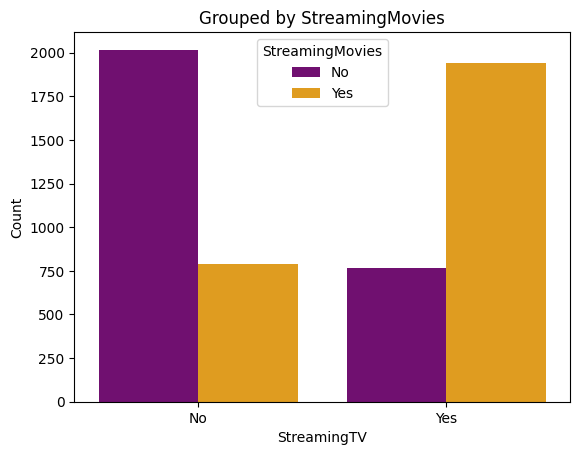

In [164]:

internet_users = data[data['InternetService']!='No'].copy()
sns.countplot(data=internet_users, x='StreamingTV', hue='StreamingMovies', palette=['purple', 'orange'])
plt.xlabel('StreamingTV')
plt.ylabel('Count')
plt.title('Grouped by StreamingMovies')
plt.show()

In [166]:
internet_users[['StreamingTV', 'StreamingMovies']].head(10)

,StreamingTV,StreamingMovies
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
5,Yes,Yes
6,Yes,No
7,No,No
8,Yes,Yes
9,No,No


In [167]:
internet_users[['StreamingTV', 'StreamingMovies']].tail(10)

,StreamingTV,StreamingMovies
7032,No,No
7033,No,No
7034,Yes,No
7035,Yes,No
7036,Yes,Yes
7038,Yes,Yes
7039,Yes,Yes
7040,No,No
7041,No,No
7042,Yes,Yes


In [170]:
internet_users.groupby(['StreamingTV', 'StreamingMovies']).size().reset_index()

,StreamingTV,StreamingMovies,0
0,No,No,2017
1,No,Yes,792
2,Yes,No,764
3,Yes,Yes,1939


We can see that having one Service does not necessarily mean that they have the other.